# Review Ratings Challenge

**Task:** Import review_ratings_headers.txt file

In [2]:
reviews=[]
with open("C:/Users/Vishnu/Desktop/review_ratings_headers.txt","rt") as ratings:
    for review in ratings:
        reviews.append(review)




**Task:**
1. Extract "user" and "id" from the first line and combine with an underscore.
1. In each line after the first line, extract the word(s) after "on" in each line, removing special characters (e.g. /n, &, etc.). 
1. If there is more than one word, combine the words with a single underscore. 
1. Put the words into a list to use as headers for your dataset later.

In [3]:
find1 ='user'
find2 ='id'

t1=reviews[0].find(find1)
t2=reviews[0].find(find2)

reviews[0][t1:t1+len(find1)]+'_'+reviews[0][t2:t2+len(find2)]



words=[]
splits=[]
search='on'
for i in range(1,len(reviews)):
    words.append(reviews[i][reviews[i].find(search)+2:])
    words[i-1]=words[i-1].replace('&','')
    words[i-1]=words[i-1].replace('/','_')
    splits.append(words[i-1].split())
    if len(splits[i-1])>1:
        splits[i-1] = '_'.join(splits[i-1][j] for j in range(len(splits[i-1])))
splits

[['churches'],
 ['resorts'],
 ['beaches'],
 ['parks'],
 ['theatres'],
 ['museums'],
 ['malls'],
 ['zoo'],
 ['restaurants'],
 ['pubs_bars'],
 'local_services',
 'burger_pizza_shops',
 'hotels_other_lodgings',
 'juice_bars',
 'art_galleries',
 'dance_clubs',
 'swimming_pools',
 ['gyms'],
 ['bakeries'],
 'beauty_spas',
 ['cafes'],
 'view_points',
 ['monuments'],
 ['gardens']]

Question 1: How many headers are there with 2 or more words combined by an underscore?

10


Question 2: How many underscores are there in all of the headers? 

12

**Task:** Read in review_ratings.csv, set names as the cleaned headers list from above, skip the first row, and do not include an index column

In [4]:
import pandas as pd
rr_data= pd.read_csv('C:/Users/Vishnu/Desktop/review_ratings.csv')
rr_data.shape

(4624, 25)

Question 3: How many rows are in the ratings dataset?

4624

**Task:** Import review_ratings_with_headers.csv

In [5]:
rrw_data= pd.read_csv('C:/Users/Vishnu/Desktop/review_ratings_with_headers.csv')

**Task:** Explore data types in the dataset

In [6]:
rrw_data.dtypes
#rrw_data

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries             object
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

Question 4: What data type is **parks**?

float (float64)

**Task:** Find special characters that are in one of the columns, replace with 0, and convert to continuous/float type

In [7]:
import numpy as np
rrw_data[rrw_data.applymap(np.isreal)]
rrw_data[rrw_data['art_galleries']=='qh']
rrw_data['art_galleries'] = pd.to_numeric(rrw_data['art_galleries'], errors='coerce')
rrW_data=rrw_data.fillna(0)
#rrw_data.dtypes

Question 5: What was the variable that contained special characters?

Art Galleries

Question 6: What is the mean of the variable now that it has been converted to type continuous/float?

2.2

**Task:** Fill missing values with 0 and run summary statistics on the dataset

In [8]:
rrw_data.isnull().values.any()
rrw_data.isnull().sum()

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            1
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

Question 7: What is the IQR of ratings for **hotels_other_lodgings**?

In [9]:
IQR = np.subtract(*np.percentile(rrw_data['hotels_other_lodgings'], [75, 25]))
IQR
#1.16

1.1600000000000001

**Task:** Import review_ratings_processed.csv

In [10]:
rr_processed = pd.read_csv('C:/Users/Vishnu/Desktop/review_ratings_processed.csv')

In [11]:
#rr_processed.shape
data = rr_processed.iloc[:,1:]

**Task:** Find the variables that are most correlated with each other

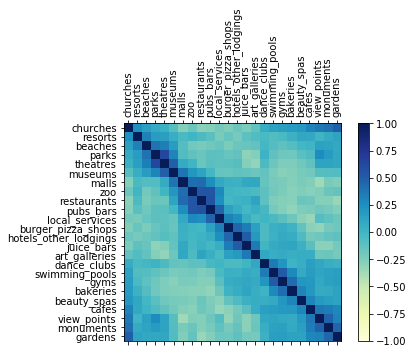

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data.corr()
corr_matrix = data.corr()
plot = plt.figure()
asub = plot.add_subplot(111)
#ca= asub.matshow(corr_matrix,cmap='bwr', vmin=-1, vmax=1)
ca= asub.matshow(corr_matrix,cmap='YlGnBu', vmin=-1, vmax=1)
plot.colorbar(ca)  #legend
points = np.arange(0,len(data.columns),1)
asub.set_xticks(points)
plt.xticks(rotation=90)
asub.set_yticks(points)
asub.set_xticklabels(data.columns)
asub.set_yticklabels(data.columns)
plt.show()

#data.corr().unstack().sort_values(ascending=False).drop_duplicates()


Question 8: Which variables are the the most **positively** correlated?

Theatres and parks

**Task:** Group each variable into 10 equal-width bins and calculate the **mean malls** rating for each bin

In [14]:
cuts=[]
means=[]

for j in data.columns:
    cuts.append(pd.cut(data[j],10,include_lowest=False,right=False))
        #print(cuts[i])
        
for i in range(len(data.columns)):
    means.append(data.groupby(by=cuts[i])['malls'].mean())


In [15]:
cutr=pd.cut(data['resorts'],10,include_lowest=False,right=False)
#data.groupby(by=cutr)['malls'].mean()
cut=cutr.unique()
#resort_mean=pd.DataFrame(means[1])
#for i in range(len(data.columns)):
 #   print(means[i])
#resort_mean
#plt.plot(cut,resort_mean)

Question 9: The chart on quanthub.com shows **mall** rating by which variable?

Museums


**Task:** Split the dataset into features that include all variables except **juice_bars** and user_id

In [250]:
data.shape
data_new=data.drop('juice_bars',axis=1)
data_new.columns
X=data_new


In [251]:
Y = data.iloc[:,13:14]
Y

,juice_bars
0,0.78
1,5.00
2,1.83
3,0.98
4,1.09
5,3.87
6,1.56
7,0.85
8,0.80
9,5.00


**Task:** Set your seed to 42 and split the data into **80%** training and **20%** test sets 

In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

**Task:** Set seed to 42 and fit a Random Forest with **10 trees/estimators** to the training set

In [253]:
#from sklearn.preprocessing import StandardScaler
#X_scaled=StandardScaler()
#X_train=X_scaled.fit_transform(X_train) #for training set we need to fit and transform
#X_test=X_scaled.transform(X_test)
#

In [254]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=42)
regressor.fit(X_train,Y_train)

C:\Users\Vishnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [255]:
Y_pred_test = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)

Question 10: What R-Squared value did the model achieve on the test set?

In [256]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_test)
#r2_score(Y_train, Y_pred_train)


0.7502168906163271

**Task:** Predict **juice_bars** ratings for the full dataset (training and test combined) and append predictions to the table

In [597]:
Y_test['Y_test_pred'] = Y_pred_test
Y_train['Y_train_pred'] = Y_pred_train

C:\Users\Vishnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vishnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [650]:
pred_data=pd.concat([Y_train,Y_test.rename(columns={'Y_test_pred':'Y_train_pred'})])
Data_final = pd.merge(data,pred_data[['Y_train_pred']],how = 'left',left_index = True, right_index = True)


In [ ]:
Data_final.columns=['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens',
       'Predictions']
user=rr_processed['user_id']
user = pd.DataFrame(user)
Data_final = pd.merge(Data_final,user[['user_id']],how = 'left',left_index = True, right_index = True)
Data_final.head()

In [675]:
Data_final= Data_final[['user_id','juice_bars',
       'Predictions','churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']]

**Task:** Compute the squared residual for each user id, append to table and sort descending by squared residual 

In [690]:
#Data_final['ssr']=(Data_final['Predictions'] - Data_final['juice_bars'])**2
Data_final.sort_values(by=['ssr'], ascending=False)

,user_id,juice_bars,Predictions,churches,resorts,beaches,parks,theatres,museums,malls,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,ssr
8,User 1578,0.80,5.000,0.59,0.63,1.47,1.46,1.48,1.49,5.00,...,0.74,0.76,5.00,0.99,0.59,0.55,0.54,0.55,0.57,17.640000
2305,User 634,5.00,0.838,1.38,1.40,1.42,2.66,2.65,3.27,3.29,...,5.00,0.54,0.00,0.00,0.00,0.00,0.00,1.41,1.39,17.322244
2939,User 4288,0.85,5.000,0.00,1.44,1.42,1.42,1.45,1.49,2.71,...,0.82,1.01,1.01,5.00,0.00,0.00,0.00,0.00,0.00,17.222500
2170,User 5383,0.86,5.000,2.23,1.82,1.81,1.50,1.28,1.27,1.28,...,3.62,0.85,0.85,5.00,3.71,3.64,5.00,2.61,2.60,17.139600
3471,User 2122,5.00,0.937,2.03,2.60,2.54,5.00,5.00,3.26,3.26,...,0.00,0.87,0.85,0.74,0.82,0.81,0.85,0.89,5.00,16.507969
4065,User 5356,1.01,5.000,2.08,2.28,1.68,1.27,1.24,1.23,1.24,...,1.09,2.48,0.93,2.48,5.00,2.50,5.00,2.46,2.45,15.920100
61,User 5418,5.00,1.196,3.61,5.00,2.65,2.63,2.60,1.90,1.88,...,0.80,0.81,0.83,0.89,0.93,0.78,0.77,0.79,4.41,14.470416
3790,User 629,5.00,1.258,1.38,1.40,1.42,1.44,2.64,3.28,3.27,...,5.00,0.00,0.00,0.00,0.00,0.00,0.78,1.42,1.38,14.002564
1507,User 2733,5.00,1.320,2.48,2.35,1.72,1.58,1.17,1.15,1.15,...,1.05,1.06,0.97,0.96,4.43,3.71,3.71,5.00,2.41,13.542400
598,User 2074,0.77,4.340,1.91,2.15,2.32,5.00,3.05,2.32,3.27,...,1.02,0.97,0.72,0.66,0.65,0.66,5.00,0.74,1.62,12.744900


Question 11: What is the value of the **top** loss?

17.64

**Task:** Extract the first tree/estimator from the Random Forest Model

In [19]:
regressor.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1608637542, splitter='best')

In [ ]:
#pip install graphviz
#conda install graphviz

**Task:** Plot the decision tree with **max depth of 3**

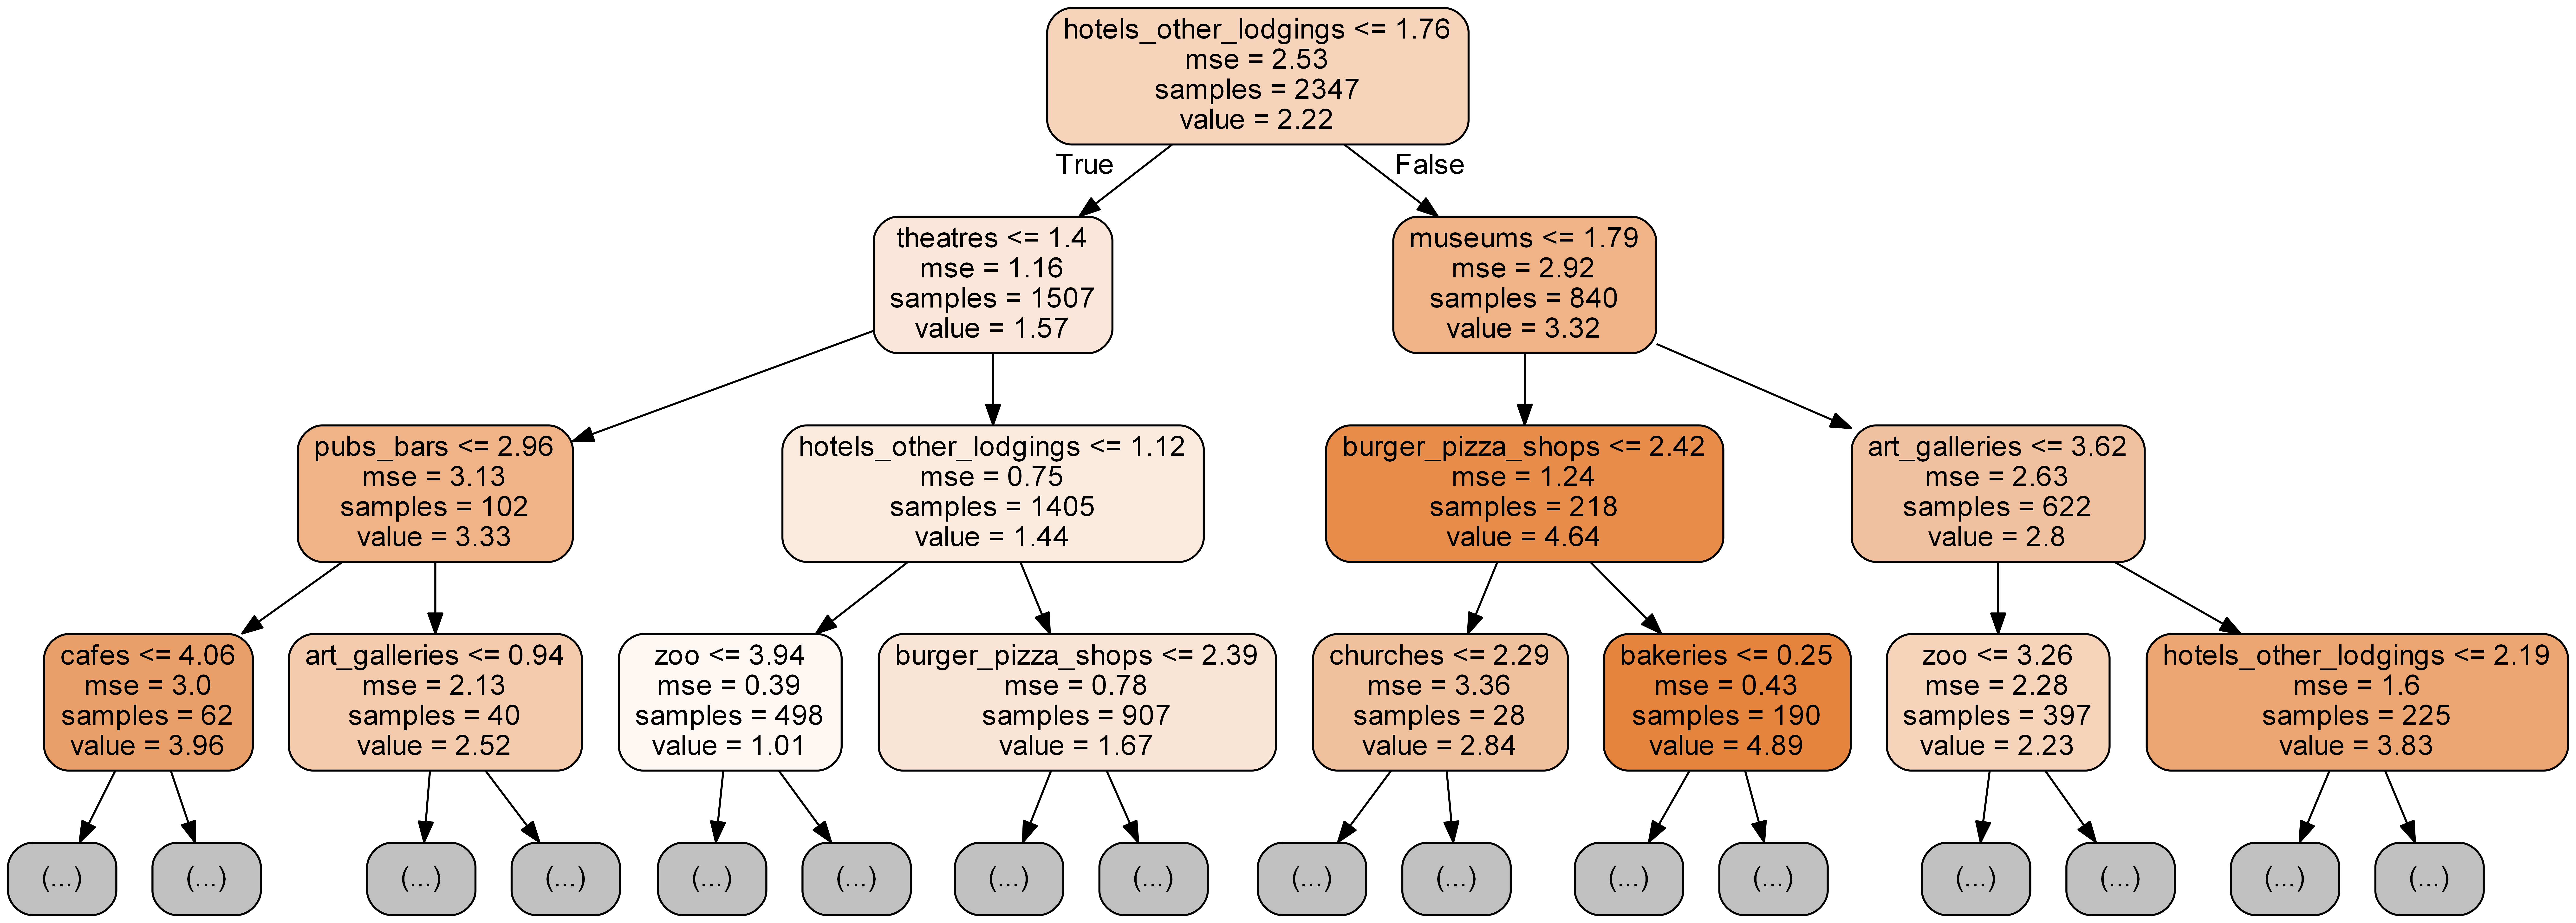

In [31]:
tree_id = 0
tree = regressor.estimators_[tree_id]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='trees.dot', 
                max_depth=3,
                feature_names = list(X_test.columns),
                class_names = Y_test.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using Graphviz
from subprocess import call
call(['dot', '-Tpng', 'trees.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the graph
from IPython.display import Image
Image(filename = 'tree.png')

Question 12: Which variables are included in the **2nd** level split?

theatres, museums

In [32]:
data.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

**Task:** Create a sparse matrix with Location (e.g. resorts, beauty_spas, swimming_pools, etc.) on the rows and UserID on the columns with ratings as the values (fill any missing ratings for users with 0)

In [228]:
sparse_data=rr_processed.T
sparse_data.columns = sparse_data.iloc[0]

In [234]:
sparse_data_Y=sparse_data.iloc[6:7,]
sparse_data_X= sparse_data.drop('museums',axis=0)
sparse_data_X= sparse_data_X.drop('user_id',axis=0)

In [235]:
sparse_data_Y
#data_sparse_Y.T.shape

user_id,User 3343,User 5248,User 3364,User 2874,User 5055,User 3148,User 2768,User 96,User 1578,User 4389,...,User 3947,User 3977,User 700,User 4106,User 3801,User 4923,User 1951,User 4892,User 1602,User 1215
museums,5,1.63,5,1.36,1.69,2.67,2.41,5,1.49,1.89,...,3.24,2.68,1.56,4.36,3.17,2.81,1.49,2.73,1.61,3.72


In [236]:
sparse_data_X_converted= sparse_data_X.copy()
sparse_data_Y_converted= sparse_data_Y.copy()
sparse_data_Y_converted

user_id,User 3343,User 5248,User 3364,User 2874,User 5055,User 3148,User 2768,User 96,User 1578,User 4389,...,User 3947,User 3977,User 700,User 4106,User 3801,User 4923,User 1951,User 4892,User 1602,User 1215
museums,5,1.63,5,1.36,1.69,2.67,2.41,5,1.49,1.89,...,3.24,2.68,1.56,4.36,3.17,2.81,1.49,2.73,1.61,3.72


In [237]:
cols = sparse_data_X.columns
sparse_data_X_converted[cols] = sparse_data_X_converted[cols].apply(pd.to_numeric, errors='coerce')
data_sparse_X=scipy.sparse.csr_matrix(sparse_data_X_converted.values)

In [238]:
cols = sparse_data_Y.columns
sparse_data_Y_converted[cols] = sparse_data_Y_converted[cols].apply(pd.to_numeric, errors='coerce')
data_sparse_Y=scipy.sparse.csr_matrix(sparse_data_Y_converted.values)

**Task:** Apply a brute-force K-Nearest Neighbors algorithm to the matrix with a cosine metric 

In [239]:
data_sparse_Y

<1x4624 sparse matrix of type '<class 'numpy.float64'>'
	with 4624 stored elements in Compressed Sparse Row format>

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

#Separate data and label
Xs = data_sparse_X
Ys = data_sparse_Y

xS = Xs.toarray()
yS = Ys.toarray()


#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)


In [241]:
xS.shape

(23, 4624)

Question 13: Which categories are included in the top 5 nearest neighbors to **museums**?

In [242]:
KNN_Regressor = KNeighborsRegressor(n_neighbors = 5, p = 2, metric='cosine',algorithm='brute')
KNN_Regressor.fit(xS, xS)
yS_pred = KNN_Regressor.predict(yS)

In [243]:
print(KNN_Regressor.kneighbors(yS)[1])

[[4 5 3 6 7]]
